# Data Understanding Profiling

In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def remove_outliers_boxplot(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1

    median = feature[np.logical_and((feature >= Q1 - 1.5 * IQR), (feature <= Q3 + 1.5 * IQR))].median()

    median

    feature[(feature < Q1 - 1.5 * IQR)] = median
    feature[(feature > Q3 + 1.5 * IQR)] = median

    pd.DataFrame(feature).boxplot()
    plt.show()
    
def remove_outliers(feature, q1, q2):
    Q1 = feature.quantile(q1)
    Q3 = feature.quantile(q2)

    median = feature[(log_feature >= Q1) & (feature <= Q3)].median()

    feature[log_feature < Q1] = median
    feature[log_feature > Q3] = median

    pd.DataFrame(feature).boxplot()
    plt.show()

In [3]:
users = pd.read_csv("dataset/user_profiles.csv", index_col = 0)

In [4]:
users.shape

(11508, 19)

In [5]:
users.head(1)

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,retweet_count_entropy
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.0,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903,1.609438


In [6]:
users.info

<bound method DataFrame.info of                           name lang  bot           created_at  statuses_count  \
2353593986     Lamonica Raborn   en    1  2019-02-22 18:00:42              76   
2358850842       Lourie Botton   en    0  2019-02-26 03:02:32               4   
137959629     Dadan Syarifudin   en    1  2015-04-30 07:09:56               7   
466124818       Carletto Focia   it    1  2017-01-18 02:49:18              50   
2571493866           MBK Ebook   en    0  2019-06-18 19:30:21               8   
...                        ...  ...  ...                  ...             ...   
2911861962  Madrid Lae Maika .   en    0  2019-11-29 13:16:02               7   
1378532629           Clau Sato   en    0  2018-04-27 03:01:58               8   
126984069   ALMA LETICIA NUÑO    es    0  2015-03-29 17:01:24               1   
2383025796     Minnie Guadagno   en    1  2019-03-13 02:44:13              42   
933183398            Corvanna    en    0  2017-11-09 23:24:16               8

## avg_length

In [7]:
users.avg_length.value_counts()

60.000000    13
57.000000     9
50.000000     9
64.000000     8
71.000000     8
             ..
67.948148     1
70.032680     1
62.942529     1
99.298701     1
52.068064     1
Name: avg_length, Length: 10794, dtype: int64

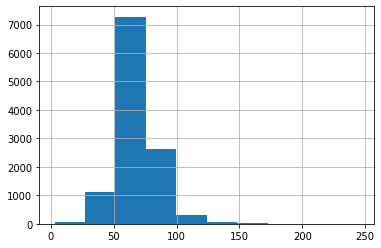

In [8]:
users.avg_length.hist()
plt.show()

In [9]:
users.avg_length.describe()

count    11508.000000
mean        68.140132
std         16.206471
min          3.000000
25%         59.398274
50%         65.527658
75%         77.422770
max        245.000000
Name: avg_length, dtype: float64

In [10]:
users.avg_length.median()

65.52765789965359

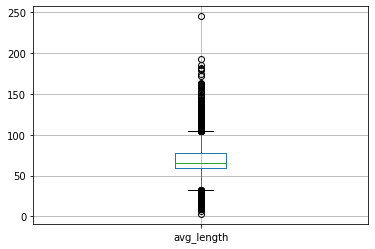

In [11]:
pd.DataFrame(users.avg_length).boxplot()
plt.show()

/var/folders/lk/pc9s8f3x0gs3hgzyhh6x1t6h0000gn/T/ipykernel_1457/1062178392.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[(feature < Q1 - 1.5 * IQR)] = median
/var/folders/lk/pc9s8f3x0gs3hgzyhh6x1t6h0000gn/T/ipykernel_1457/1062178392.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature[(feature > Q3 + 1.5 * IQR)] = median


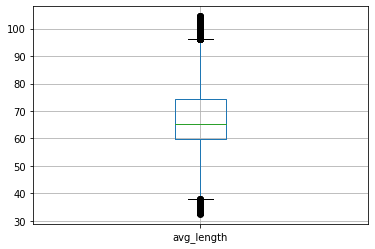

In [12]:
remove_outliers_boxplot(users.avg_length)

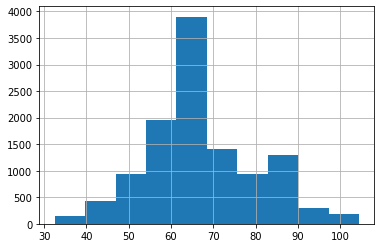

In [13]:
users.avg_length.hist()
plt.show()

## avg_special_chars

In [14]:
users.avg_special_chars.value_counts()

13.000000    34
14.000000    30
15.000000    23
12.000000    19
14.666667    19
             ..
18.503876     1
12.524872     1
16.116667     1
17.209358     1
11.291587     1
Name: avg_special_chars, Length: 9943, dtype: int64

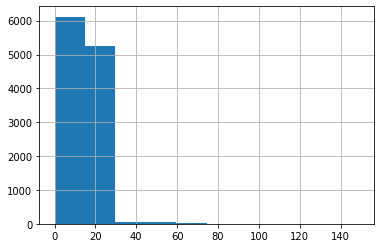

In [15]:
users.avg_special_chars.hist()
plt.show()

In [16]:
users.avg_special_chars.describe() 

count    11508.000000
mean        15.481021
std          5.457811
min          0.000000
25%         13.181641
50%         14.694363
75%         17.228965
max        149.000000
Name: avg_special_chars, dtype: float64

In [17]:
users.avg_special_chars.median()

14.69436341242059

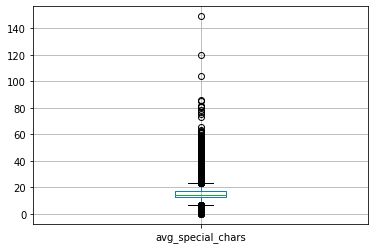

In [18]:
pd.DataFrame(users.avg_special_chars).boxplot()
plt.show()

<AxesSubplot:>

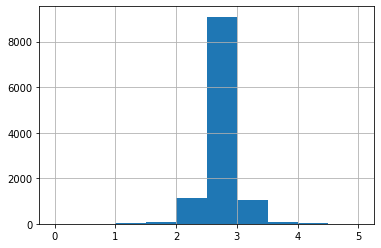

In [19]:
log_feature = pd.Series(np.log(users.avg_special_chars + 1))
log_feature.hist()

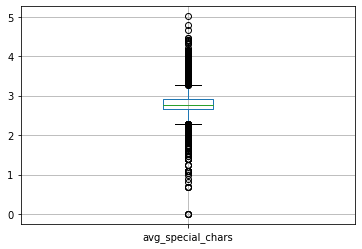

In [20]:
pd.DataFrame(log_feature).boxplot()
plt.show()

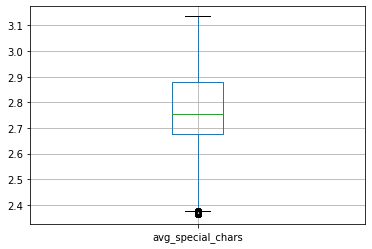

In [21]:
remove_outliers(log_feature, 0.05, 0.95)

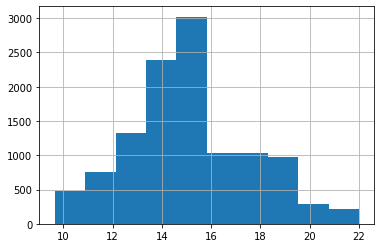

In [22]:
users.avg_special_chars = pd.Series(np.exp(log_feature) - 1)
users.avg_special_chars.hist()
plt.show()

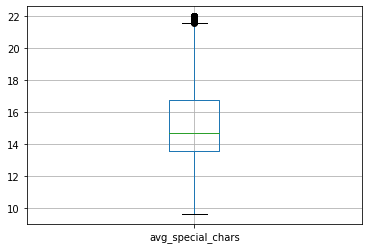

In [23]:
pd.DataFrame(users.avg_special_chars).boxplot()
plt.show()

## urls_ratio

In [24]:
users.urls_ratio.value_counts()

0.000000    5104
1.000000      67
0.050000      31
0.040000      29
0.047619      29
            ... 
0.006751       1
0.724675       1
0.020518       1
0.661855       1
0.011707       1
Name: urls_ratio, Length: 5028, dtype: int64

In [25]:
users.urls_ratio.describe()

count    11508.000000
mean         0.085288
std          0.178616
min          0.000000
25%          0.000000
50%          0.016129
75%          0.070043
max          2.000000
Name: urls_ratio, dtype: float64

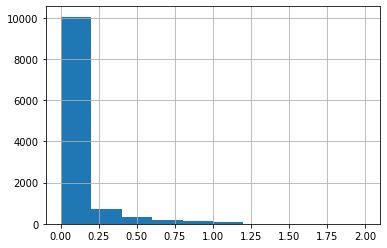

In [26]:
users.urls_ratio.hist()
plt.show()

In [27]:
users.urls_ratio.median()

0.0161290322580645

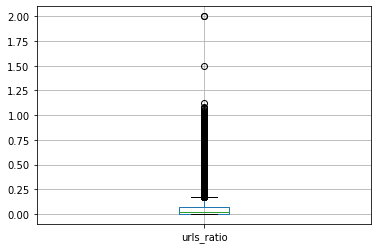

In [28]:
pd.DataFrame(users.urls_ratio).boxplot()
plt.show()

<AxesSubplot:>

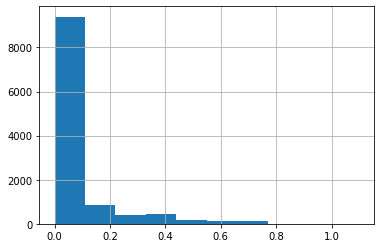

In [29]:
log_feature = pd.Series(np.log(users.urls_ratio + 1))
log_feature.hist()

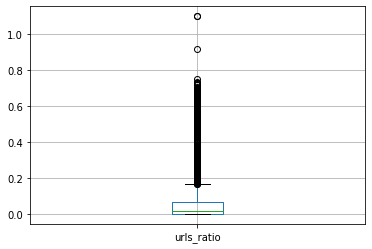

In [30]:
pd.DataFrame(log_feature).boxplot()
plt.show()

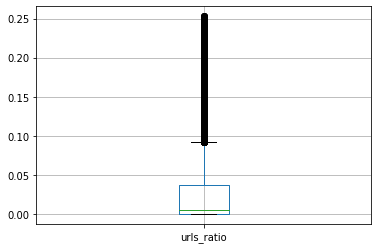

In [31]:
remove_outliers(log_feature, 0.0, 0.90)

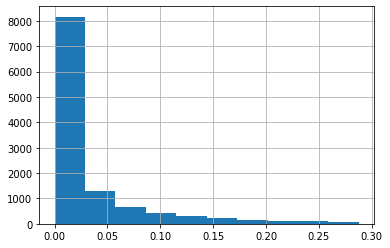

In [32]:
users.urls_ratio = pd.Series(np.exp(log_feature) - 1)
users.urls_ratio.hist()
plt.show()

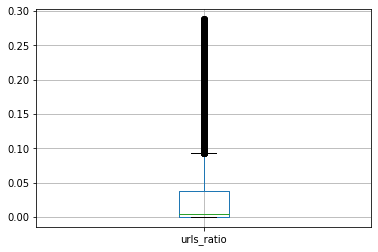

In [33]:
pd.DataFrame(users.urls_ratio).boxplot()
plt.show()

## mentions_ratio

In [34]:
users.mentions_ratio.value_counts()

0.000000    2093
0.333333     110
1.000000      48
0.285714      34
0.300000      32
            ... 
1.298795       1
0.401198       1
1.076923       1
0.378151       1
0.785189       1
Name: mentions_ratio, Length: 5968, dtype: int64

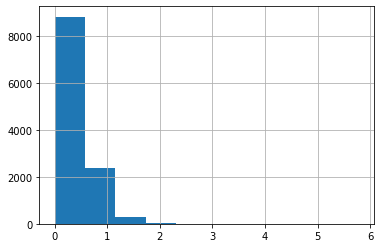

In [35]:
users.mentions_ratio.hist()
plt.show()

In [36]:
users.mentions_ratio.describe()

count    11508.000000
mean         0.353244
std          0.361926
min          0.000000
25%          0.010260
50%          0.304348
75%          0.503422
max          5.785124
Name: mentions_ratio, dtype: float64

In [37]:
users.mentions_ratio.median()

0.3043478260869565

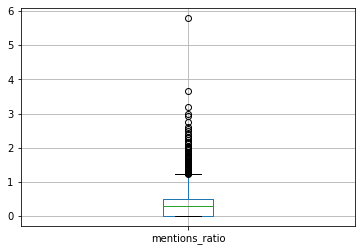

In [38]:
pd.DataFrame(users.mentions_ratio).boxplot()
plt.show()

<AxesSubplot:>

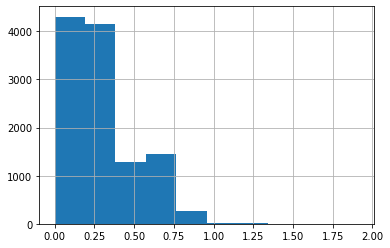

In [39]:
log_feature = pd.Series(np.log(users.mentions_ratio + 1))
log_feature.hist()

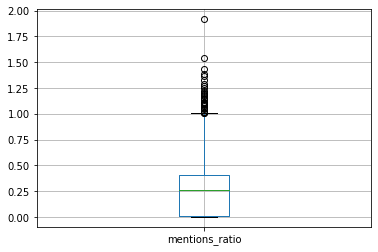

In [40]:
pd.DataFrame(log_feature).boxplot()
plt.show()

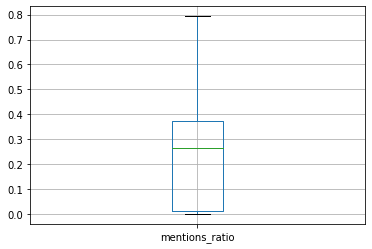

In [41]:
remove_outliers(log_feature, 0.0, 0.98)

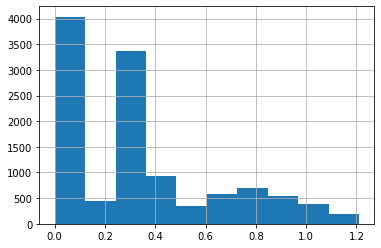

In [42]:
users.mentions_ratio = pd.Series(np.exp(log_feature) - 1)
users.mentions_ratio.hist()
plt.show()

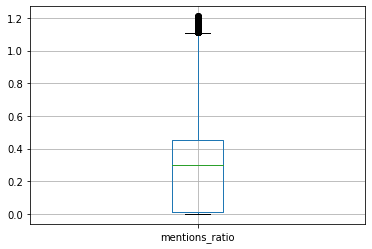

In [43]:
pd.DataFrame(users.mentions_ratio).boxplot()
plt.show()

## hashtags_ratio

In [44]:
users.hashtags_ratio.value_counts()

0.000000    1054
0.125000      63
0.090909      57
0.076923      56
0.200000      54
            ... 
0.027190       1
0.070455       1
0.244161       1
0.054230       1
0.041111       1
Name: hashtags_ratio, Length: 5562, dtype: int64

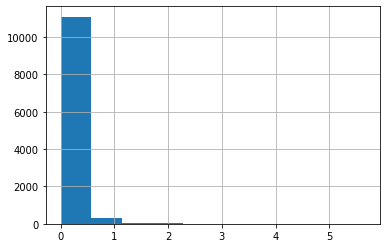

In [45]:
users.hashtags_ratio.hist()
plt.show()

In [46]:
users.hashtags_ratio.describe()

count    11508.000000
mean         0.140665
std          0.212670
min          0.000000
25%          0.045455
50%          0.076923
75%          0.153658
max          5.669974
Name: hashtags_ratio, dtype: float64

In [47]:
users.hashtags_ratio.median()

0.0769230769230769

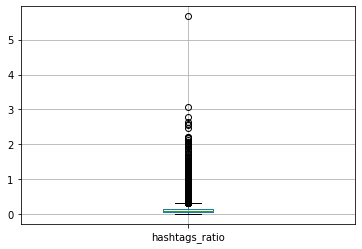

In [48]:
pd.DataFrame(users.hashtags_ratio).boxplot()
plt.show()

<AxesSubplot:>

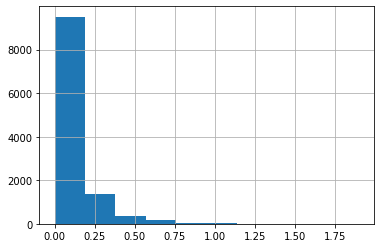

In [49]:
log_feature = pd.Series(np.log(users.hashtags_ratio + 1))
log_feature.hist()

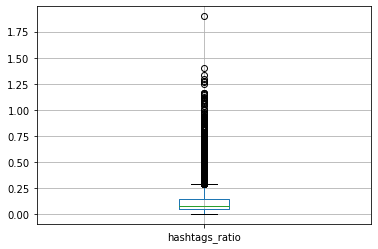

In [50]:
pd.DataFrame(log_feature).boxplot()
plt.show()

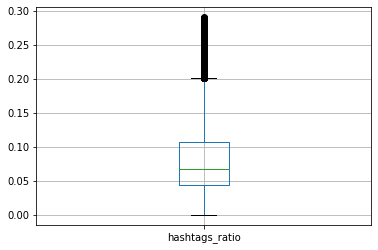

In [51]:
remove_outliers_boxplot(log_feature)

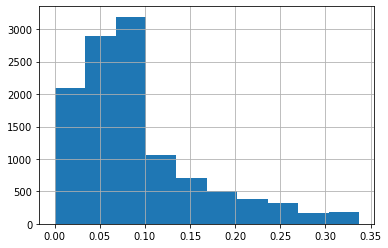

In [52]:
users.hashtags_ratio = pd.Series(np.exp(log_feature) - 1)
users.hashtags_ratio.hist()
plt.show()

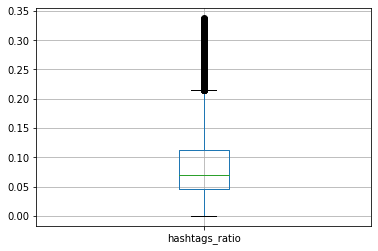

In [53]:
pd.DataFrame(users.hashtags_ratio).boxplot()
plt.show()

## reply_count_mean

In [54]:
users.reply_count_mean.value_counts()

0.000000    9590
0.047619      51
0.045455      42
0.038462      41
0.050000      40
            ... 
0.059152       1
0.207143       1
0.592834       1
0.015812       1
0.067356       1
Name: reply_count_mean, Length: 622, dtype: int64

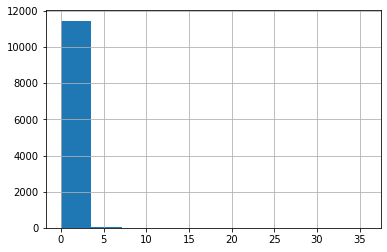

In [55]:
users.reply_count_mean.hist()
plt.show()

In [56]:
users.reply_count_mean.describe()

count    11508.000000
mean         0.064377
std          0.774512
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.666667
Name: reply_count_mean, dtype: float64

In [57]:
users.reply_count_mean.median()

0.0

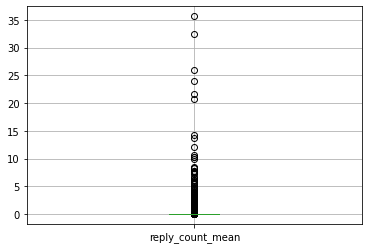

In [58]:
pd.DataFrame(users.reply_count_mean).boxplot()
plt.show()

<AxesSubplot:>

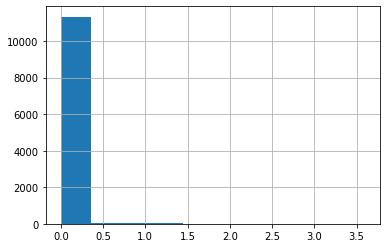

In [59]:
log_feature = pd.Series(np.log(users.reply_count_mean + 1))
log_feature.hist()

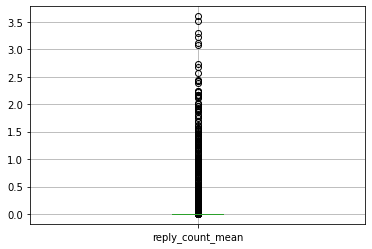

In [60]:
pd.DataFrame(log_feature).boxplot()
plt.show()

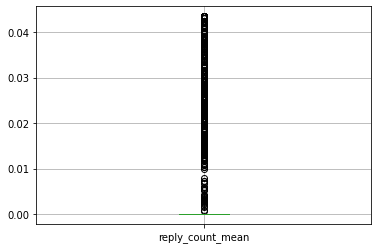

In [61]:
remove_outliers(log_feature, 0.0, 0.90)

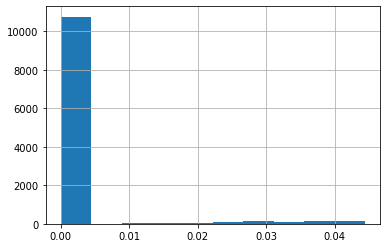

In [62]:
users.reply_count_mean = pd.Series(np.exp(log_feature) - 1)
users.reply_count_mean.hist()
plt.show()

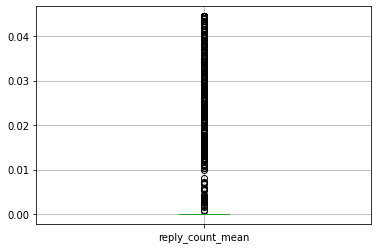

In [63]:
pd.DataFrame(users.reply_count_mean).boxplot()
plt.show()

## reply_count_std

In [64]:
users.reply_count_std.value_counts()

0.000000     9596
0.192308       41
0.195959       38
0.203931       38
0.217945       38
             ... 
0.557875        1
0.354043        1
12.727843       1
0.341868        1
3.567308        1
Name: reply_count_std, Length: 834, dtype: int64

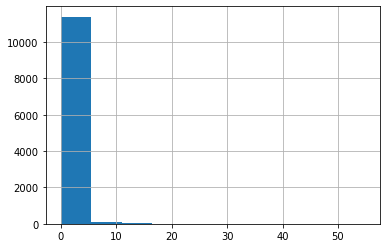

In [65]:
users.reply_count_std.hist()
plt.show()

In [66]:
users.reply_count_std.describe()

count    11508.000000
mean         0.207825
std          1.671741
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         54.899340
Name: reply_count_std, dtype: float64

In [67]:
users.reply_count_std.median()

0.0

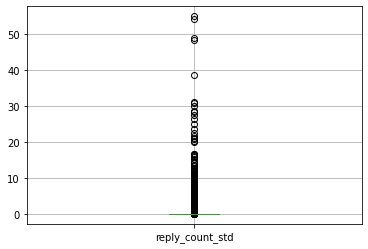

In [68]:
pd.DataFrame(users.reply_count_std).boxplot()
plt.show()

<AxesSubplot:>

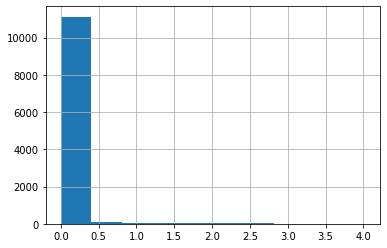

In [69]:
log_feature = pd.Series(np.log(users.reply_count_std + 1))
log_feature.hist()

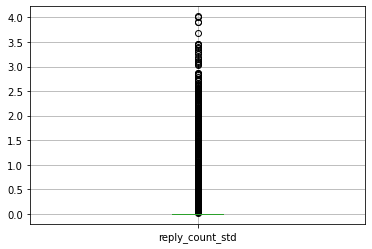

In [70]:
pd.DataFrame(log_feature).boxplot()
plt.show()

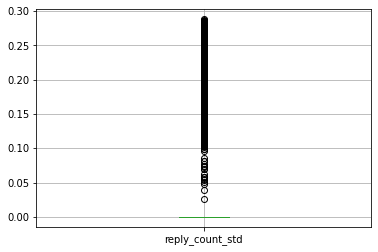

In [71]:
remove_outliers(log_feature, 0.0, 0.95)

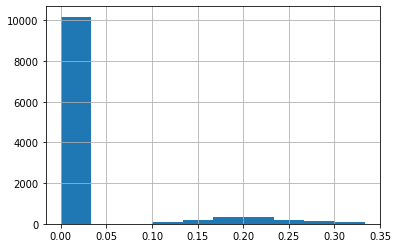

In [72]:
users.reply_count_std = pd.Series(np.exp(log_feature) - 1)
users.reply_count_std.hist()
plt.show()

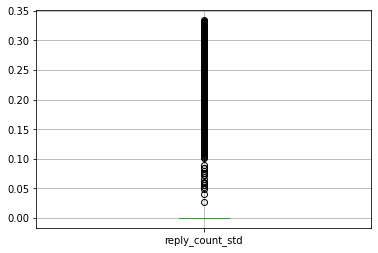

In [73]:
pd.DataFrame(users.reply_count_std).boxplot()
plt.show()

## reply_count_entropy

In [74]:
users.reply_count_entropy.value_counts()

0.000000    10515
0.693147      313
1.098612      132
1.386294       64
0.636514       51
            ...  
1.724507        1
3.192446        1
3.422414        1
0.856094        1
2.882973        1
Name: reply_count_entropy, Length: 279, dtype: int64

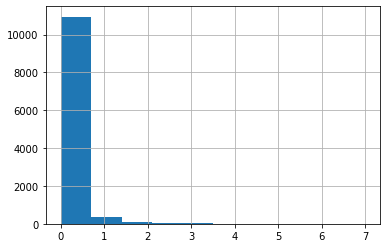

In [75]:
users.reply_count_entropy.hist()
plt.show()

In [76]:
users.reply_count_entropy.describe()

count    11508.000000
mean         0.106565
std          0.432352
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.003780
Name: reply_count_entropy, dtype: float64

In [77]:
users.reply_count_entropy.median()

0.0

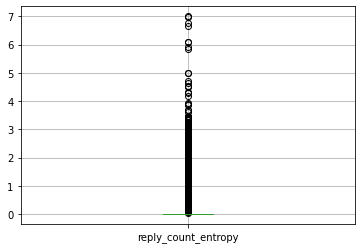

In [78]:
pd.DataFrame(users.reply_count_entropy).boxplot()
plt.show()

<AxesSubplot:>

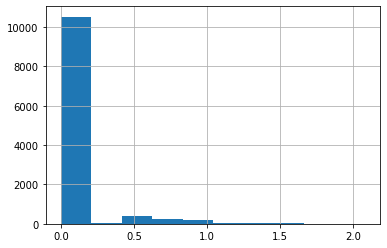

In [79]:
log_feature = pd.Series(np.log(users.reply_count_entropy + 1))
log_feature.hist()

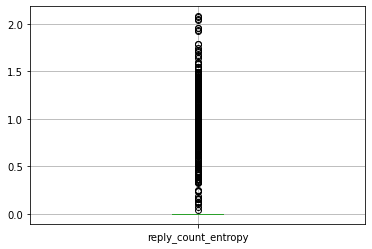

In [80]:
pd.DataFrame(log_feature).boxplot()
plt.show()

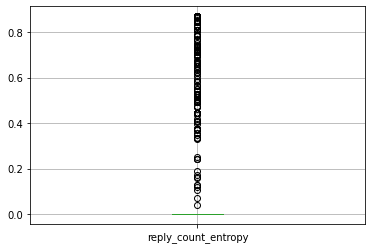

In [81]:
remove_outliers(log_feature, 0.0, 0.98)

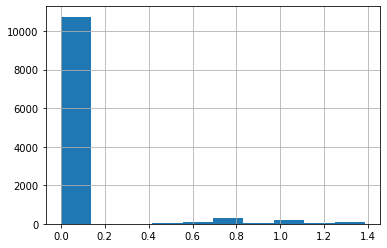

In [82]:
users.reply_count_entropy = pd.Series(np.exp(log_feature) - 1)
users.reply_count_entropy.hist()
plt.show()

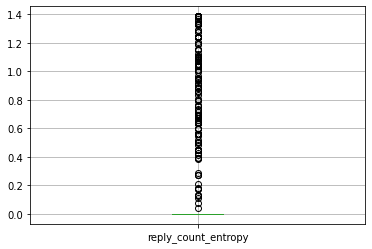

In [83]:
pd.DataFrame(users.reply_count_entropy).boxplot()
plt.show()

## favorite_count_mean

In [84]:
users.favorite_count_mean.value_counts()

0.000000    1995
0.037037      49
0.055556      48
0.052632      47
0.050000      46
            ... 
0.005844       1
0.188445       1
0.012382       1
0.132149       1
0.118160       1
Name: favorite_count_mean, Length: 5768, dtype: int64

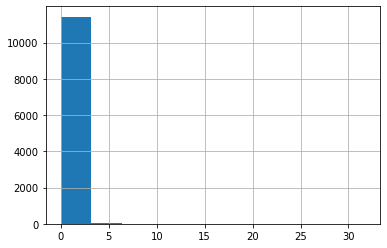

In [85]:
users.favorite_count_mean.hist()
plt.show()

In [86]:
users.favorite_count_mean.describe()

count    11508.000000
mean         0.242864
std          0.804560
min          0.000000
25%          0.017751
50%          0.052632
75%          0.180490
max         31.738277
Name: favorite_count_mean, dtype: float64

In [87]:
users.favorite_count_mean.median()

0.0526315789473684

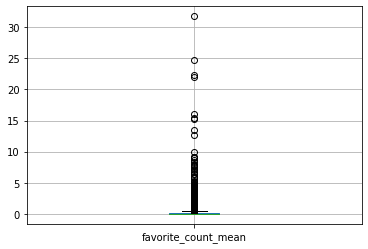

In [88]:
pd.DataFrame(users.favorite_count_mean).boxplot()
plt.show()

<AxesSubplot:>

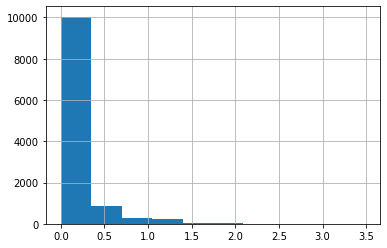

In [89]:
log_feature = pd.Series(np.log(users.favorite_count_mean + 1))
log_feature.hist()

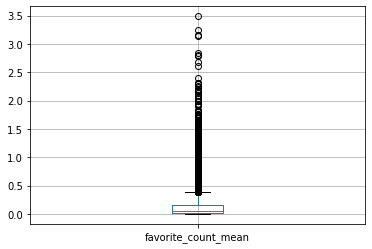

In [90]:
pd.DataFrame(log_feature).boxplot()
plt.show()

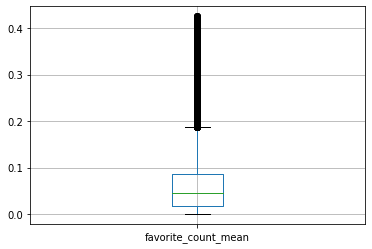

In [91]:
remove_outliers(log_feature, 0.0, 0.90)

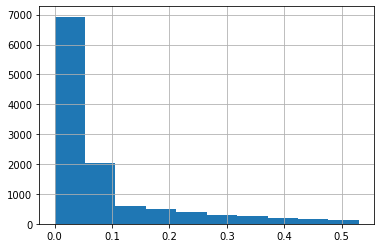

In [92]:
users.favorite_count_mean = pd.Series(np.exp(log_feature) - 1)
users.favorite_count_mean.hist()
plt.show()

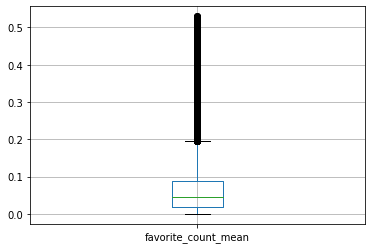

In [93]:
pd.DataFrame(users.favorite_count_mean).boxplot()
plt.show()

## favorite_count_std

In [94]:
users.favorite_count_std.value_counts()

0.000000    2005
0.188853      44
0.173993      39
0.192308      37
0.203931      36
            ... 
0.294026       1
0.128190       1
0.269486       1
0.180956       1
0.381551       1
Name: favorite_count_std, Length: 6777, dtype: int64

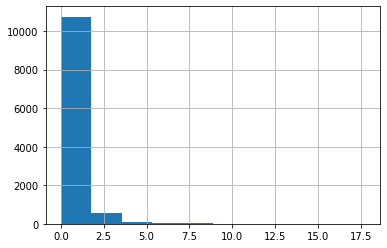

In [95]:
users.favorite_count_std.hist()
plt.show()

In [96]:
users.favorite_count_std.describe()

count    11508.000000
mean         0.554219
std          1.041246
min          0.000000
25%          0.136692
50%          0.240501
75%          0.570995
max         17.745109
Name: favorite_count_std, dtype: float64

In [97]:
users.favorite_count_std.median()

0.2405011652824552

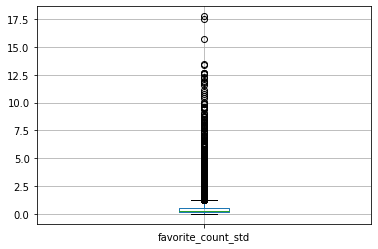

In [98]:
pd.DataFrame(users.favorite_count_std).boxplot()
plt.show()

<AxesSubplot:>

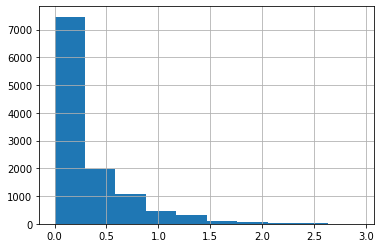

In [99]:
log_feature = pd.Series(np.log(users.favorite_count_std + 1))
log_feature.hist()

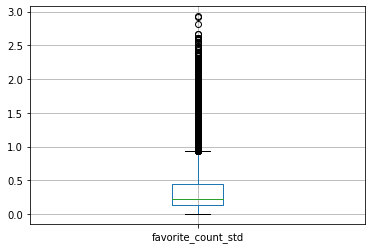

In [100]:
pd.DataFrame(log_feature).boxplot()
plt.show()

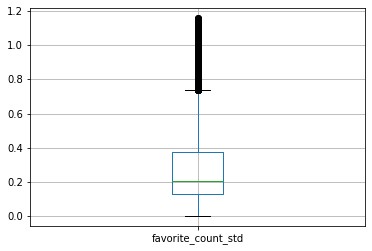

In [101]:
remove_outliers(log_feature, 0.0, 0.95)

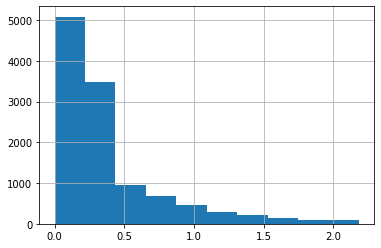

In [102]:
users.favorite_count_std = pd.Series(np.exp(log_feature) - 1)
users.favorite_count_std.hist()
plt.show()

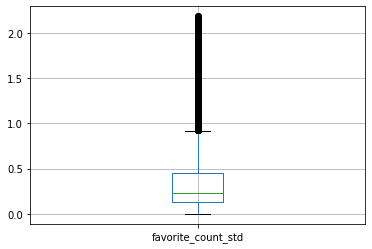

In [103]:
pd.DataFrame(users.favorite_count_std).boxplot()
plt.show()

## favorite_count_entropy

In [104]:
users.favorite_count_entropy.value_counts()

0.000000    2831
1.609438     463
1.386294     408
1.791759     375
1.098612     350
            ... 
4.082587       1
5.562176       1
6.568404       1
5.368904       1
5.852158       1
Name: favorite_count_entropy, Length: 4672, dtype: int64

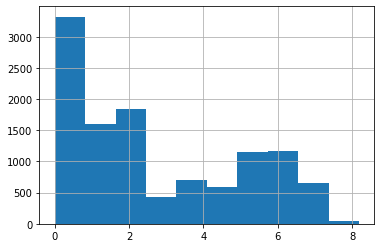

In [105]:
users.favorite_count_entropy.hist()
plt.show()

In [106]:
users.favorite_count_entropy.describe()

count    11508.000000
mean         2.680103
std          2.353441
min          0.000000
25%          0.450561
50%          1.945910
75%          5.065383
max          8.187960
Name: favorite_count_entropy, dtype: float64

In [107]:
users.favorite_count_entropy.median()

1.9459101490553128

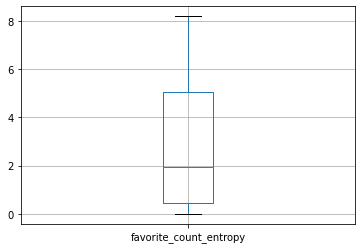

In [108]:
pd.DataFrame(users.favorite_count_entropy).boxplot()
plt.show()

<AxesSubplot:>

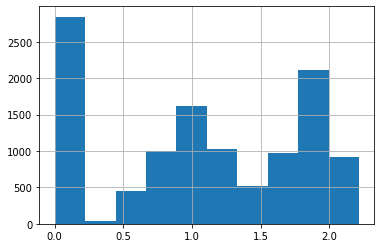

In [109]:
log_feature = pd.Series(np.log(users.favorite_count_entropy + 1))
log_feature.hist()

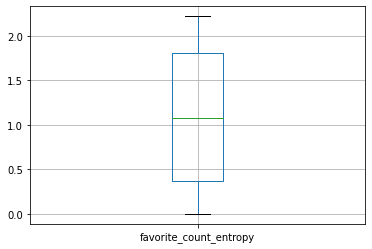

In [110]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## retweet_count_mean

In [111]:
users.retweet_count_mean.value_counts()

0.000000     2327
0.040000       41
0.027778       36
0.043478       36
0.050000       34
             ... 
4.374101        1
7.129371        1
12.009360       1
16.172703       1
16.206643       1
Name: retweet_count_mean, Length: 5960, dtype: int64

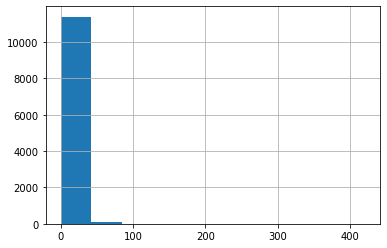

In [112]:
users.retweet_count_mean.hist()
plt.show()

In [113]:
users.retweet_count_mean.describe()

count    11508.000000
mean         4.066886
std         12.149058
min          0.000000
25%          0.010526
50%          0.054054
75%          3.404726
max        421.000000
Name: retweet_count_mean, dtype: float64

In [114]:
users.retweet_count_mean.median()

0.054054054054054

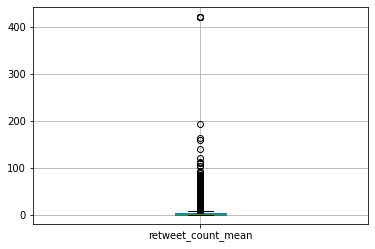

In [115]:
pd.DataFrame(users.retweet_count_mean).boxplot()
plt.show()

<AxesSubplot:>

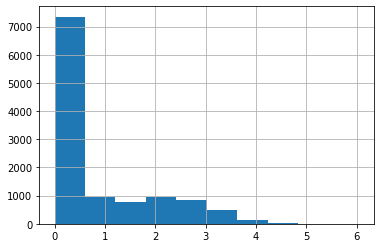

In [116]:
log_feature = pd.Series(np.log(users.retweet_count_mean + 1))
log_feature.hist()

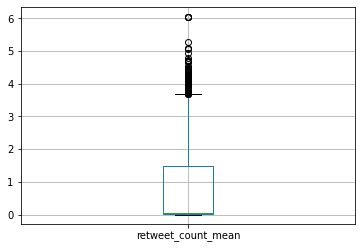

In [117]:
pd.DataFrame(log_feature).boxplot()
plt.show()

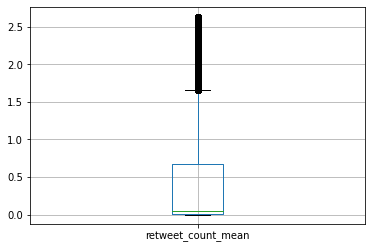

In [118]:
remove_outliers(log_feature, 0.0, 0.90)

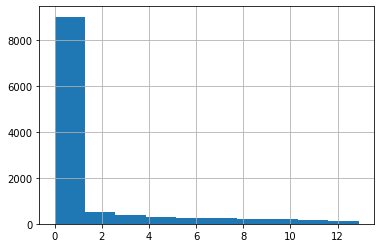

In [119]:
users.retweet_count_mean = pd.Series(np.exp(log_feature) - 1)
users.retweet_count_mean.hist()
plt.show()

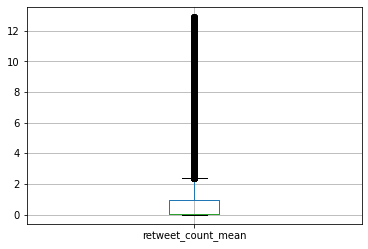

In [120]:
pd.DataFrame(users.retweet_count_mean).boxplot()
plt.show()

## retweet_count_std

In [121]:
users.retweet_count_std.value_counts()

0.000000     2336
0.195959       35
0.203931       32
0.199826       31
0.173993       30
             ... 
53.250405       1
47.203464       1
0.076460        1
60.514224       1
56.984353       1
Name: retweet_count_std, Length: 6609, dtype: int64

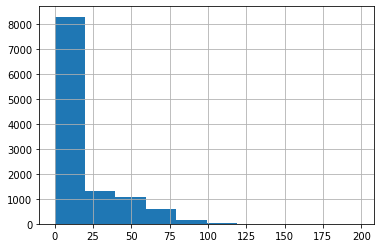

In [122]:
users.retweet_count_std.hist()
plt.show()

In [123]:
users.retweet_count_std.describe()

count    11508.000000
mean        14.574041
std         23.390000
min          0.000000
25%          0.104251
50%          0.238606
75%         24.144412
max        198.461303
Name: retweet_count_std, dtype: float64

In [124]:
users.retweet_count_std.median()

0.2386062992124791

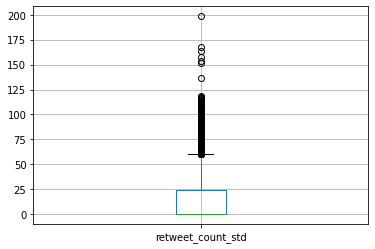

In [125]:
pd.DataFrame(users.retweet_count_std).boxplot()
plt.show()

<AxesSubplot:>

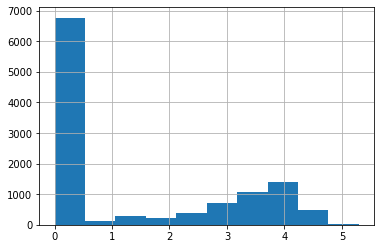

In [126]:
log_feature = pd.Series(np.log(users.retweet_count_std + 1))
log_feature.hist()

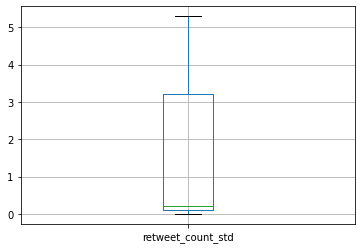

In [127]:
pd.DataFrame(log_feature).boxplot()
plt.show()

## retweet_count_entropy

In [128]:
users.retweet_count_entropy.value_counts()

0.000000    3136
0.693147     491
1.386294     442
1.098612     441
1.609438     377
            ... 
0.212994       1
1.978165       1
2.846604       1
5.166244       1
5.990673       1
Name: retweet_count_entropy, Length: 5005, dtype: int64

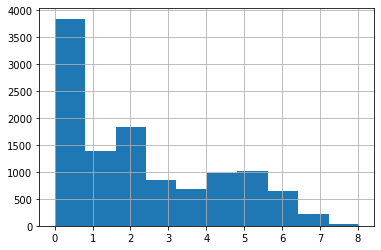

In [129]:
users.retweet_count_entropy.hist()
plt.show()

In [130]:
users.retweet_count_entropy.describe()

count    11508.000000
mean         2.241280
std          2.064845
min          0.000000
25%          0.000000
50%          1.747868
75%          4.046369
max          8.027767
Name: retweet_count_entropy, dtype: float64

In [131]:
users.retweet_count_entropy.median()

1.7478680974667575

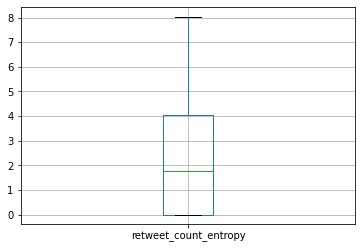

In [132]:
pd.DataFrame(users.retweet_count_entropy).boxplot()
plt.show()

## Correlation

In [133]:
users.corr()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,retweet_count_entropy
bot,1.000000,0.515150,0.126591,0.140359,-0.322305,-0.519415,-0.121062,0.079697,0.121745,0.091439,-0.259242,-0.273943,-0.326927,-0.370136,-0.505984,-0.374498
statuses_count,0.515150,1.000000,0.354900,0.305768,-0.127028,-0.321957,-0.218290,-0.059822,-0.096351,-0.049899,-0.064241,0.010287,0.244586,-0.095454,-0.188697,0.203306
avg_length,0.126591,0.354900,1.000000,0.779780,0.143874,-0.044475,0.059221,-0.095862,-0.121249,-0.068942,0.070223,0.089376,0.218707,-0.021394,0.062955,0.244410
avg_special_chars,0.140359,0.305768,0.779780,1.000000,0.108603,-0.136604,0.046785,-0.043800,-0.048765,-0.028258,0.023202,0.040277,0.130213,-0.060071,-0.002588,0.140167
urls_ratio,-0.322305,-0.127028,0.143874,0.108603,1.000000,0.389005,0.196606,-0.031935,-0.042723,-0.026675,0.238524,0.243809,0.294521,0.328091,0.487065,0.367915
mentions_ratio,-0.519415,-0.321957,-0.044475,-0.136604,0.389005,1.000000,0.051575,-0.217912,-0.303193,-0.189884,0.358427,0.388922,0.439821,0.419240,0.639983,0.536572
hashtags_ratio,-0.121062,-0.218290,0.059221,0.046785,0.196606,0.051575,1.000000,0.187857,0.262906,0.208175,0.021910,0.002536,-0.083023,0.077067,0.151696,-0.011242
reply_count_mean,0.079697,-0.059822,-0.095862,-0.043800,-0.031935,-0.217912,0.187857,1.000000,0.549497,0.153856,-0.116558,-0.119060,-0.252657,-0.104751,-0.137983,-0.245663
reply_count_std,0.121745,-0.096351,-0.121249,-0.048765,-0.042723,-0.303193,0.262906,0.549497,1.000000,0.544638,-0.173733,-0.182238,-0.374225,-0.149169,-0.192500,-0.360851
reply_count_entropy,0.091439,-0.049899,-0.068942,-0.028258,-0.026675,-0.189884,0.208175,0.153856,0.544638,1.000000,-0.089517,-0.096165,-0.259775,-0.097177,-0.109497,-0.253293


In [134]:
mat_corr = users.corr()

# Identifies correlated variables
for i in range(16):
    for j in range(i):
        if abs(mat_corr.iat[i, j]) > 0.8:
            print(mat_corr.columns[i], " - ", mat_corr.columns[j], " - ", mat_corr.iat[i, j])
            

retweet_count_entropy  -  favorite_count_entropy  -  0.8895100683493148


In [135]:
# TODO: rimuovi correlati

del users["retweet_count_entropy"]

## Save to file

In [136]:
users.to_csv("cleaned_user_profile.csv")